In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "drive/MyDrive/PA/pa1"

In [2]:
import pandas as pd
import numpy as np


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# Q7
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_constant = SimpleImputer(strategy='constant')
imp_most_frequent = SimpleImputer(strategy='most_frequent')

imp_mean.set_output(transform="pandas")
imp_median.set_output(transform="pandas")
imp_constant.set_output(transform="pandas")
imp_most_frequent.set_output(transform="pandas")

# update train set
fill_mean = imp_mean.fit_transform(train.select_dtypes(include="number"))
fill_median = imp_median.fit_transform(train.select_dtypes(include="number"))
fil_constant = imp_constant.fit_transform(train.select_dtypes(exclude="number"))
fill_most_fre = imp_most_frequent.fit_transform(train.select_dtypes(exclude="number"))

for i in fill_median.columns:
    train[i] = fill_median[i]

for i in fill_most_fre.columns:
    train[i] = fill_most_fre[i]

#update test set
fill_median = imp_median.fit_transform(test.select_dtypes(include="number"))
fill_most_fre = imp_most_frequent.fit_transform(test.select_dtypes(exclude="number"))

for i in fill_median.columns:
    test[i] = fill_median[i]

for i in fill_most_fre.columns:
    test[i] = fill_most_fre[i]


In [5]:
# Q8
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()
scaler_standard.set_output(transform="pandas")
scaler_minmax.set_output(transform="pandas")
scaler_robust.set_output(transform="pandas")

sample_numeric =train.select_dtypes(include="number")
print("Before processing: ")
print(sample_numeric.iloc[0:10,0])

print("After processing using StandardScaler: ")
standard = scaler_standard.fit_transform(sample_numeric)
print(standard.iloc[0:10,0])

print("After processing using MinMaxScaler: ")
minmax = scaler_minmax.fit_transform(sample_numeric)
print(minmax.iloc[0:10,0])

print("After processing using RobustScaler: ")
robust = scaler_robust.fit_transform(sample_numeric)
print(robust.iloc[0:10,0])
# update train set
for i in robust.columns:
    train[i] = robust[i]

# update test set
robust = scaler_robust.fit_transform(test.select_dtypes(include="number"))
for i in robust.columns:
    test[i] = robust[i]


Before processing: 
0    65.00
1    65.00
2    59.50
3    66.55
4    71.00
5    70.00
6    57.50
7    65.50
8    70.00
9    80.00
Name: C6, dtype: float64
After processing using StandardScaler: 
0   -0.200135
1   -0.200135
2   -1.031074
3    0.034039
4    0.706344
5    0.555264
6   -1.333234
7   -0.124595
8    0.555264
9    2.066063
Name: C6, dtype: float64
After processing using MinMaxScaler: 
0    0.368421
1    0.368421
2    0.252632
3    0.401053
4    0.494737
5    0.473684
6    0.210526
7    0.378947
8    0.473684
9    0.684211
Name: C6, dtype: float64
After processing using RobustScaler: 
0   -0.206667
1   -0.206667
2   -0.940000
3    0.000000
4    0.593333
5    0.460000
6   -1.206667
7   -0.140000
8    0.460000
9    1.793333
Name: C6, dtype: float64


In [6]:
# Q9
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# update train set
categoric = train.select_dtypes(exclude="number")
categoric = categoric.drop(columns='classification target')

binary = categoric[['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']]
nominal = categoric[['C0', 'C1', 'C3', 'C7']]
ordinal = categoric[['C2','C5']]

# One-hot encoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
for col in nominal.columns:
    onehot_encoder.fit(nominal[[col]])
    # update train set
    onehot_encoded_train = onehot_encoder.transform(nominal[[col]])
    onehot_encoded_train_df = pd.DataFrame(onehot_encoded_train, columns=onehot_encoder.get_feature_names_out([col]))
    index = train.columns.get_loc(col)
    train = train.drop(columns=col)
    for new_col in onehot_encoded_train_df.columns:
        train.insert(index, new_col, onehot_encoded_train_df[new_col])

    # update test set
    onehot_encoded_test = onehot_encoder.transform(nominal[[col]])
    onehot_encoded_test_df = pd.DataFrame(onehot_encoded_test, columns=onehot_encoder.get_feature_names_out([col]))
    index = test.columns.get_loc(col)
    test = test.drop(columns=col)
    for new_col in onehot_encoded_test_df.columns:
        test.insert(index, new_col, onehot_encoded_test_df[new_col])
    

# Ordinal encoder
ordinal_encoder1 = OrdinalEncoder(categories=[['first choice','second choice','third choice','fourth choice','fifth choice','sixth choice','seventh choice','last choice']])
ordinal_encoder1.fit(ordinal[['C2']])
# update train set
ordinal_encoded1_train = ordinal_encoder1.transform(ordinal[['C2']])
train["C2"] = ordinal_encoded1_train
# update test set
ordinal_encoded1_test = ordinal_encoder1.transform(test[['C2']])
test["C2"] = ordinal_encoded1_test

# print(ordinal['C5'].value_counts())
ordinal_encoder2 = OrdinalEncoder(categories=[["Basic education 2nd cycle (6th/7th/8th year) or equiv.",                                  
                                    "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
                                    "10th year of schooling",
                                    "10th year of schooling - not completed",
                                    "11th year of schooling - not completed",
                                    "Other - 11th year of schooling",
                                    "12th year of schooling - not completed",
                                    "Secondary education",
                                    "Technological specialization course",
                                    "Professional higher technical course",
                                    "Frequency of higher education",
                                    "Higher education - degree (1st cycle)",
                                    "Higher education - degree",
                                    "Higher education - bachelor's degree",
                                    "Higher education - master (2nd cycle)",
                                    "Higher education - master's",
                                    "Higher education - doctorate"]])
ordinal_encoder2.fit(ordinal[['C5']])
# update train set
ordinal_encoded2_train = ordinal_encoder2.transform(ordinal[['C5']])
train["C5"] = ordinal_encoded2_train
# update test set
ordinal_encoded2_test = ordinal_encoder2.transform(test[['C5']])
test["C5"] = ordinal_encoded2_test

ordinal_encoder3 = OrdinalEncoder()
for col in binary.columns:
    ordinal_encoder3.fit(binary[[col]])
    # update train set
    binary_encoded_train = ordinal_encoder3.transform(binary[[col]])
    train[col] = binary_encoded_train
    #update test set
    binary_encoded_test = ordinal_encoder3.transform(test[[col]])
    test[col] = binary_encoded_test

target_encoder = OrdinalEncoder(categories=[['failure','success']])
target_encoder.set_output(transform='pandas')
target_encoder.fit(train[["classification target"]])
train['classification target'] = target_encoder.transform(train[["classification target"]])
test['classification target'] = target_encoder.transform(test[["classification target"]])

print("Before processing: ")
print(categoric.iloc[0:10,0])

print("After processing: ")
print(train.iloc[0:10,0:5])



Before processing: 
0    divorced
1      single
2      single
3     married
4      single
5      single
6      single
7      single
8      single
9      single
Name: C0, dtype: object
After processing: 
   C0_widower  C0_single  C0_married  C0_legally separated  C0_facto union
0         0.0        0.0         0.0                   0.0             0.0
1         0.0        1.0         0.0                   0.0             0.0
2         0.0        1.0         0.0                   0.0             0.0
3         0.0        0.0         1.0                   0.0             0.0
4         0.0        1.0         0.0                   0.0             0.0
5         0.0        1.0         0.0                   0.0             0.0
6         0.0        1.0         0.0                   0.0             0.0
7         0.0        1.0         0.0                   0.0             0.0
8         0.0        1.0         0.0                   0.0             0.0
9         0.0        1.0         0.0           

In [7]:
# Q10

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

# update train set
reg_target = train['regression target']
cla_target = train['classification target']
features = train.drop(columns=['regression target','classification target'])

# print(len(features.columns))

selector_varThres = VarianceThreshold(threshold=0.05)
selector_varThres.set_output(transform='pandas')
selector_varThres.fit(features)
result_varThres_train = selector_varThres.transform(features)
result_varThres_test = selector_varThres.transform(test.drop(columns=['regression target','classification target']))
# print(len(result_varThres_train.columns))
print("The features remove: ")
for i in (set(features.columns)-set(result_varThres_train.columns)):
    print(i,end=", ")
print('\n')

# selectHBest for regression
selector_KBest_reg = SelectKBest(k=10)
selector_KBest_reg.set_output(transform='pandas')
selector_KBest_reg.fit(X=result_varThres_train,y=reg_target)
result_selectKBest_train_reg = selector_KBest_reg.transform(X=result_varThres_train)
result_selectKBest_test = selector_KBest_reg.transform(X=result_varThres_test)
# print(len(result_selectKBest_train_reg.columns))
print("The features remove(regression): ")
for i in (set(result_varThres_train.columns)-set(result_selectKBest_train_reg.columns)):
    print(i,end=", ")
print('\n')

# update train set
train_reg = pd.concat([result_selectKBest_train_reg,reg_target,cla_target],axis=1)
# update test set
test = pd.concat([result_selectKBest_test,test['regression target'],test['classification target']],axis=1)

# selectKBest for classification
selector_KBest_cla = SelectKBest(k=10)
selector_KBest_cla.set_output(transform='pandas')
selector_KBest_cla.fit(X=result_varThres_train,y=cla_target)
result_selectKBest_train_cla = selector_KBest_cla.transform(X=result_varThres_train)
result_selectKBest_test = selector_KBest_cla.transform(X=result_varThres_test)
# print(len(result_selectKBest_train_cla.columns))
print("The features remove(classification): ")
for i in (set(result_varThres_train.columns)-set(result_selectKBest_train_cla.columns)):
    print(i,end=", ")
print('\n')
train_cla = pd.concat([result_selectKBest_train_cla,reg_target,cla_target],axis=1)
# print(train.columns)
# print(test.columns)
# test.head(20)

# print(train_reg.columns)
print(train_cla.columns)



The features remove: 
C1_Ordinance No. 533-A/99, item b3 (Other Institution), C1_Ordinance No. 612/93, C7_Santomean, C1_International student (bachelor), C1_1st phase - special contingent (Azores Island), C3_Equinculture, C7_Colombian, C7_Turkish, C7_Portuguese, C3_Social Service (evening attendance), C7_Lithuanian, C1_Holders of other higher courses, C1_3rd phase - general contingent, C0_facto union, C7_Mozambican, C1_Transfer, C3_Oral Hygiene, C1_Technological specialization diploma holders, C1_Change of institution/course, C3_Basic Education, C7_Russian, C0_widower, C7_Spanish, C3_Biofuel Production Technologies, C3_Informatics Engineering, C7_Dutch, C15, C9, C7_Italian, C7_German, C7_Mexican, C1_Short cycle diploma holders, C1_Ordinance No. 854-B/99, C3_Animation and Multimedia Design, C0_legally separated, C1_Ordinance No. 533-A/99, item b2) (Different Plan), C7_Ukrainian, C1_Change of institution/course (International), C7_Brazilian, C3_Agronomy, C7_Guinean, C7_Moldova (Republic 

Part3

In [8]:
# 6.1
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1
features = train.drop(columns=['regression target','classification target'])
regression_target = train["regression target"]
X_train, X_test, y_train, y_test = train_test_split(features, regression_target, test_size=0.2, random_state=4211)
c4 = X_train['C4']
c6 = X_train['C6']
c12 = X_train['C12']
c13 = X_train['C13']
c17 = X_train['C17']
c20 = X_train['C20']
model1 = LinearRegression()
model1.fit(c4.to_numpy().reshape(-1,1),y_train)
model2 = LinearRegression()
model2.fit(c6.to_numpy().reshape(-1,1),y_train)
model3 = LinearRegression()
model3.fit(c12.to_numpy().reshape(-1,1),y_train)
model4 = LinearRegression()
model4.fit(c13.to_numpy().reshape(-1,1),y_train)
model5 = LinearRegression()
model5.fit(c17.to_numpy().reshape(-1,1),y_train)
model6 = LinearRegression()
model6.fit(c20.to_numpy().reshape(-1,1),y_train)

# Step 2
model7 = LinearRegression()
start = time.time()
model7.fit(X_train.filter(items = ['C4','C6','C12','C13','C17','C20']),y_train)
end = time.time()
training_time_regression = end - start


In [9]:
# Q12
from sklearn.metrics import r2_score
prediction1 = model1.predict(X_test['C4'].to_numpy().reshape(-1,1))
prediction2 = model2.predict(X_test['C6'].to_numpy().reshape(-1,1))
prediction3 = model3.predict(X_test['C12'].to_numpy().reshape(-1,1))
prediction4 = model4.predict(X_test['C13'].to_numpy().reshape(-1,1))
prediction5 = model5.predict(X_test['C17'].to_numpy().reshape(-1,1))
prediction6 = model6.predict(X_test['C20'].to_numpy().reshape(-1,1))
prediction7 = model7.predict(X_test.filter(items = ['C4','C6','C12','C13','C17','C20']))


# Compute R2 score of models
r2_score1 = r2_score(y_test,prediction1)
print("The R2 score of model1: " + str(r2_score1))
r2_score2 = r2_score(y_test,prediction2)
print("The R2 score of model2: " + str(r2_score2))
r2_score3 = r2_score(y_test,prediction3)
print("The R2 score of model3: " + str(r2_score3))
r2_score4 = r2_score(y_test,prediction4)
print("The R2 score of model4: " + str(r2_score4))
r2_score5 = r2_score(y_test,prediction5)
print("The R2 score of model5: " + str(r2_score5))
r2_score6 = r2_score(y_test,prediction6)
print("The R2 score of model6: " + str(r2_score6))
r2_score7 = r2_score(y_test,prediction7)
print("The R2 score of model7: " + str(r2_score7))


The R2 score of model1: -0.0003744371420333348
The R2 score of model2: 0.3457983455467901
The R2 score of model3: 1.7846745361538296e-05
The R2 score of model4: 0.0006658771013723364
The R2 score of model5: 0.007309433419105615
The R2 score of model6: -0.009428052250592511
The R2 score of model7: 0.3413484238149961


In [10]:
# Q13
from sklearn.metrics import mean_squared_error
# Compute MSE score of models
mse_score1 = mean_squared_error(y_test,prediction1)
print("The MSE score of model1: " + str(mse_score1))
mse_score2 = mean_squared_error(y_test,prediction2)
print("The MSE score of model2: " + str(mse_score2))
mse_score3 = mean_squared_error(y_test,prediction3)
print("The MSE score of model3: " + str(mse_score3))
mse_score4 = mean_squared_error(y_test,prediction4)
print("The MSE score of model4: " + str(mse_score4))
mse_score5 = mean_squared_error(y_test,prediction5)
print("The MSE score of model5: " + str(mse_score5))
mse_score6 = mean_squared_error(y_test,prediction6)
print("The MSE score of model6: " + str(mse_score6))
mse_score7 = mean_squared_error(y_test,prediction7)
print("The MSE score of model7: " + str(mse_score7))

The MSE score of model1: 0.6815216974805299
The MSE score of model2: 0.4456857407425141
The MSE score of model3: 0.6812544475679918
The MSE score of model4: 0.6808129661267935
The MSE score of model5: 0.6762869330627097
The MSE score of model6: 0.6876896231172029
The MSE score of model7: 0.4487173238175194


In [11]:
# Q14
c5 = X_train['C5']
model = LinearRegression()
model.fit(c5.to_numpy().reshape(-1,1),y_train)
prediction = model.predict(X_test['C5'].to_numpy().reshape(-1,1))

r2_C5 = r2_score(y_test,prediction)
print("The R2 score of model using C5: " + str(r2_C5))

mse_C5 = mean_squared_error(y_test,prediction)
print("The MSE score of model using C5: " + str(mse_C5))

The R2 score of model using C5: 0.009919110811005383
The MSE score of model using C5: 0.6745090470032805


In [12]:
# 6.2
# Q15
from sklearn.neural_network import MLPRegressor


start = 0
end = 0
# H = 1
training_time_1 = np.zeros((3,))
R2_score_1 = np.zeros((3,))
for i in range(3):
    model_1 = MLPRegressor(hidden_layer_sizes=(1,1,1),early_stopping=True)
    start = time.time()
    model_1.fit(X_train.filter(items = ['C4','C6','C12','C13','C17','C20']), y_train)
    end = time.time()
    prediction_1 = model_1.predict(X_test.filter(items = ['C4','C6','C12','C13','C17','C20']))
    training_time_1[i] = end - start
    R2_score_1[i] = r2_score(y_test,prediction_1)
mean_training_time_1 = np.mean(training_time_1)
std_training_time_1 = np.std(training_time_1)
mean_R2_1 = np.mean(R2_score_1)
std_R2_1 = np.std(R2_score_1)
print("For model H = 1: ")
print("mean of training time: " + str(mean_training_time_1) + ", standard deviation of training time: " + str(std_training_time_1))
print("mean of R2 score: " + str(mean_R2_1) + ", standard deviation of R2 score: " + str(std_R2_1))

# H = 8
training_time_8 = np.zeros((3,))
R2_score_8 = np.zeros((3,))
for i in range(3):
    model_8 = MLPRegressor(hidden_layer_sizes=(8,8,8),early_stopping=True)
    start = time.time()
    model_8.fit(X_train.filter(items = ['C4','C6','C12','C13','C17','C20']), y_train)
    end = time.time()
    prediction_8 = model_8.predict(X_test.filter(items = ['C4','C6','C12','C13','C17','C20']))
    training_time_8[i] = end - start
    R2_score_8[i] = r2_score(y_test,prediction_8)
mean_training_time_8 = np.mean(training_time_8)
std_training_time_8 = np.std(training_time_8)
mean_R2_8 = np.mean(R2_score_8)
std_R2_8 = np.std(R2_score_8)
print("For model H = 8: ")
print("mean of training time: " + str(mean_training_time_8) + ", standard deviation of training time: " + str(std_training_time_8))
print("mean of R2 score: " + str(mean_R2_8) + ", standard deviation of R2 score: " + str(std_R2_8))

# H = 32
training_time_32 = np.zeros((3,))
R2_score_32 = np.zeros((3,))
for i in range(3):
    model_32 = MLPRegressor(hidden_layer_sizes=(32,32,32),early_stopping=True)
    start = time.time()
    model_32.fit(X_train.filter(items = ['C4','C6','C12','C13','C17','C20']), y_train)
    end = time.time()
    prediction_32 = model_32.predict(X_test.filter(items = ['C4','C6','C12','C13','C17','C20']))
    training_time_32[i] = end - start
    R2_score_32[i] = r2_score(y_test,prediction_32)
mean_training_time_32 = np.mean(training_time_32)
std_training_time_32 = np.std(training_time_32)
mean_R2_32 = np.mean(R2_score_32)
std_R2_32 = np.std(R2_score_32)
print("For model H = 32: ")
print("mean of training time: " + str(mean_training_time_32) + ", standard deviation of training time: " + str(std_training_time_32))
print("mean of R2 score: " + str(mean_R2_32) + ", standard deviation of R2 score: " + str(std_R2_32))

# H = 128
training_time_128 = np.zeros((3,))
R2_score_128 = np.zeros((3,))
for i in range(3):
    model_128 = MLPRegressor(hidden_layer_sizes=(128,128,128),early_stopping=True)
    start = time.time()
    model_128.fit(X_train.filter(items = ['C4','C6','C12','C13','C17','C20']), y_train)
    end = time.time()
    prediction_128 = model_128.predict(X_test.filter(items = ['C4','C6','C12','C13','C17','C20']))
    training_time_128[i] = end - start
    R2_score_128[i] = r2_score(y_test,prediction_128)
mean_training_time_128 = np.mean(training_time_128)
std_training_time_128 = np.std(training_time_128)
mean_R2_128 = np.mean(R2_score_128)
std_R2_128 = np.std(R2_score_128)
print("For model H = 128: ")
print("mean of training time: " + str(mean_training_time_128) + ", standard deviation of training time: " + str(std_training_time_128))
print("mean of R2 score: " + str(mean_R2_128) + ", standard deviation of R2 score: " + str(std_R2_128))


For model H = 1: 
mean of training time: 0.22290380795796713, standard deviation of training time: 0.06670528712540734
mean of R2 score: -0.0030741702136748796, standard deviation of R2 score: 0.002531052285937885
For model H = 8: 
mean of training time: 0.6214750607808431, standard deviation of training time: 0.20356459458740783
mean of R2 score: 0.399849699012161, standard deviation of R2 score: 0.0037522944339751464
For model H = 32: 
mean of training time: 0.4094099203745524, standard deviation of training time: 0.07333638462458937
mean of R2 score: 0.4100931935108698, standard deviation of R2 score: 0.0018273138478068895
For model H = 128: 
mean of training time: 0.6196820735931396, standard deviation of training time: 0.10914049687254687
mean of R2 score: 0.40396341273477104, standard deviation of R2 score: 0.011320620081307737


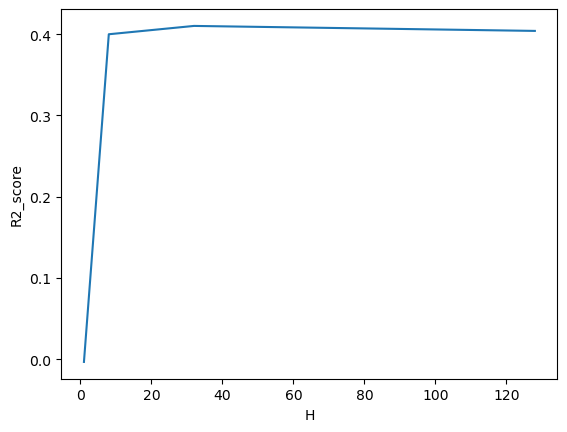

In [13]:
# Q16
import matplotlib.pyplot as plt
h = [1,8,32,128]
R2 = [mean_R2_1,mean_R2_8,mean_R2_32,mean_R2_128]
plt.xlabel("H")
plt.ylabel("R2_score")
plt.plot(h,R2)

In [14]:
print("Regression Model:")
print("Training time: {}, R2 score: {}.".format(training_time_regression,r2_score7))
print("MLPRegressor Model:")
print("Training time: {}, R2 score: {}.".format(mean_training_time_32,mean_R2_32))

Regression Model:
Training time: 0.0, R2 score: 0.3413484238149961.
MLPRegressor Model:
Training time: 0.4094099203745524, R2 score: 0.4100931935108698.


In [15]:
# 7.1
features = train_cla.drop(columns=['regression target','classification target'])
classification_target = train_cla["classification target"]
X_train, X_test, y_train, y_test = train_test_split(features, classification_target, test_size=0.2, random_state=4211)

# Q17
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
start = 0
end = 0
training_time = np.zeros((3,))
acc = np.zeros((3,))
F1_score = np.zeros((3,))

for i in range(3):
    clas_model = SGDClassifier(loss="log_loss")
    start = time.time()
    clas_model.fit(X_train,y_train)
    end = time.time()
    pred = clas_model.predict(X_test)
    training_time[i] = end-start
    acc[i] = accuracy_score(y_test,pred)
    F1_score[i] = f1_score(y_test,pred,pos_label= 1)

mean_training_time_logistic = np.mean(training_time)
std_training_time = np.std(training_time)
mean_acc_logistic = np.mean(acc)
std_acc = np.std(acc)
mean_F1_logistic = np.mean(F1_score)
std_F1 = np.std(F1_score)
print("mean of the training time: " + str(mean_training_time_logistic) + ", standard deviation of the training time: " + str(std_training_time))
print("mean of accuracy: " + str(mean_acc_logistic) + ", standard deviation of accuracy: " + str(std_acc))
print("mean of F1 score: " + str(mean_F1_logistic) + ", standard deviation of F1 score: " + str(std_F1))


mean of the training time: 0.016555945078531902, standard deviation of the training time: 0.0027398790938198453
mean of accuracy: 0.8498116760828625, standard deviation of accuracy: 0.0006658255943375962
mean of F1 score: 0.8952938518665411, standard deviation of F1 score: 0.0010654078108708195


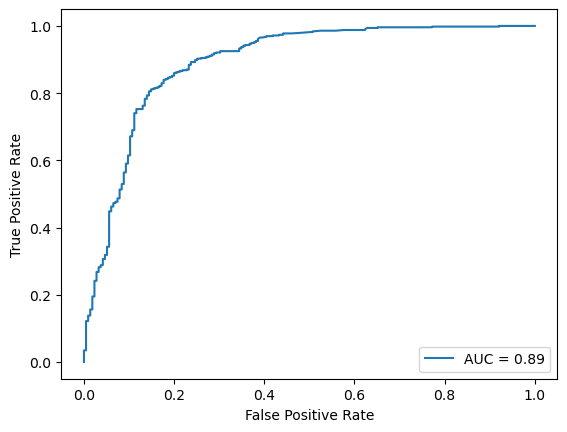

In [16]:
# Q18
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

predict = clas_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [17]:
# Q19
etas = [0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
for eta in etas:
    acc = np.zeros((3,))
    F1_score = np.zeros((3,))

    for i in range(3):
        clas_model = SGDClassifier(loss="log_loss",eta0=eta,learning_rate='constant',random_state=4211)
        clas_model.fit(X_train,y_train)
        pred = clas_model.predict(X_test)
        acc[i] = accuracy_score(y_test,pred)
        F1_score[i] = f1_score(y_test,pred,pos_label= 1)

    mean_acc = np.mean(acc)
    std_acc = np.std(acc)
    mean_F1 = np.mean(F1_score)
    std_F1 = np.std(F1_score)
    print("learning rate = {lr}: ".format(lr=eta))
    print("mean of accuracy: " + str(mean_acc) + ", standard deviation of accuracy: " + str(std_acc))
    print("mean of F1 score: " + str(mean_F1) + ", standard deviation of F1 score: " + str(std_F1))

learning rate = 0.5: 
mean of accuracy: 0.6313559322033898, standard deviation of accuracy: 0.0
mean of F1 score: 0.7585568917668826, standard deviation of F1 score: 0.0
learning rate = 0.45: 
mean of accuracy: 0.6666666666666666, standard deviation of accuracy: 0.0
mean of F1 score: 0.7873873873873874, standard deviation of F1 score: 0.0
learning rate = 0.4: 
mean of accuracy: 0.6709039548022598, standard deviation of accuracy: 0.0
mean of F1 score: 0.7906558849955077, standard deviation of F1 score: 0.0
learning rate = 0.35: 
mean of accuracy: 0.6751412429378533, standard deviation of accuracy: 1.1102230246251565e-16
mean of F1 score: 0.7942754919499105, standard deviation of F1 score: 1.1102230246251565e-16
learning rate = 0.3: 
mean of accuracy: 0.6920903954802261, standard deviation of accuracy: 1.1102230246251565e-16
mean of F1 score: 0.8063943161634103, standard deviation of F1 score: 0.0
learning rate = 0.25: 
mean of accuracy: 0.693502824858757, standard deviation of accuracy:

In [18]:
# 7.2
# Q20
from sklearn.neural_network import MLPClassifier
H = [1,8,32,128]
training_mlp = []
acc_mlp = []
F1_mlp = []
for h in H:
    start = 0
    end = 0
    training_time = np.zeros((3,))
    accuracy = np.zeros((3,))
    F1_score = np.zeros((3,))
    for i in range(3):
        model = MLPClassifier(hidden_layer_sizes=(h,h,h), early_stopping=True)
        start = time.time()
        model.fit(X_train,y_train)
        end = time.time()
        pred = model.predict(X_test)
        training_time[i] = end - start
        accuracy[i] = accuracy_score(y_test,pred)
        F1_score[i] = f1_score(y_test,pred)        
    mean_training = np.mean(training_time)
    std_training = np.std(training_time)
    training_mlp.append(mean_training)
    mean_acc = np.mean(accuracy)
    std_acc = np.std(accuracy)
    acc_mlp.append(mean_acc)
    mean_F1 = np.mean(F1_score)
    std_F1 = np.std(F1_score)
    F1_mlp.append(mean_F1)
    
    print("H = {}: ".format(h))
    print("mean of the training time: " + str(mean_training) + ", standard deviation of the training time: " + str(std_training))
    print("mean of accuracy: " + str(mean_acc) + ", standard deviation of accuracy: " + str(std_acc))
    print("mean of F1 score: " + str(mean_F1) + ", standard deviation of F1 score: " + str(std_F1))


H = 1: 
mean of the training time: 0.08744486172993977, standard deviation of the training time: 0.02631227084672469
mean of accuracy: 0.565442561205273, standard deviation of accuracy: 0.18509951522585705
mean of F1 score: 0.5473216763807938, standard deviation of F1 score: 0.3870148688592483
H = 8: 
mean of the training time: 0.22829580307006836, standard deviation of the training time: 0.09596908172828315
mean of accuracy: 0.8564030131826742, standard deviation of accuracy: 0.006757391758195531
mean of F1 score: 0.9007756447056247, standard deviation of F1 score: 0.003998738771902624
H = 32: 
mean of the training time: 0.25635282198588055, standard deviation of the training time: 0.05651995164649874
mean of accuracy: 0.8644067796610169, standard deviation of accuracy: 0.006420989499522533
mean of F1 score: 0.9063248465481116, standard deviation of F1 score: 0.004038353763837243
H = 128: 
mean of the training time: 0.4072291851043701, standard deviation of the training time: 0.004631

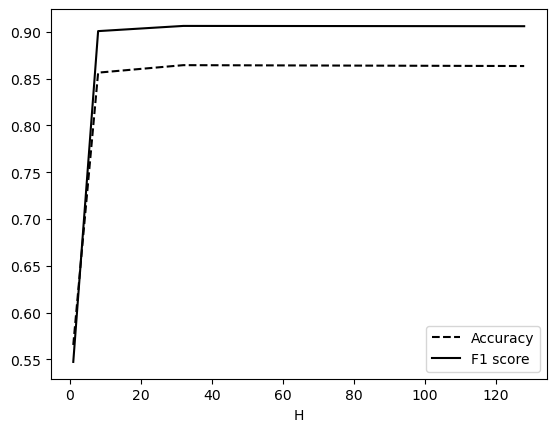

In [19]:
# Q21
plt.xlabel("H")
plt.plot(H,acc_mlp,'k--', label='Accuracy')
plt.plot(H,F1_mlp,'k', label='F1 score')
plt.legend()
plt.show()

In [20]:
# Q22
print("Logistic Regression Model: ")
print("Training Time: {}, Accuracy: {}, F1 score: {}".format(mean_training_time_logistic,mean_acc_logistic,mean_F1_logistic))
print("MLPClassifier Model: ")
print("Training Time: {}, Accuracy: {}, F1 score: {}".format(training_mlp[2],acc_mlp[2],F1_mlp[2]))

Logistic Regression Model: 
Training Time: 0.016555945078531902, Accuracy: 0.8498116760828625, F1 score: 0.8952938518665411
MLPClassifier Model: 
Training Time: 0.25635282198588055, Accuracy: 0.8644067796610169, F1 score: 0.9063248465481116


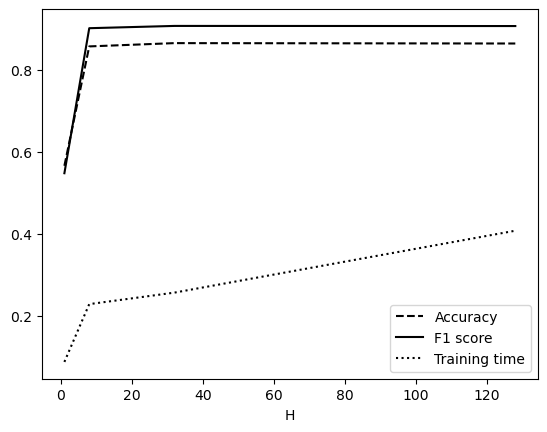

In [21]:
# Q23
plt.xlabel("H")
plt.plot(H,acc_mlp,'k--', label='Accuracy')
plt.plot(H,F1_mlp,'k', label='F1 score')
plt.plot(H,training_mlp,'k:', label='Training time')
plt.legend()
plt.show()

Part 5

In [22]:
# 8.1
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import sklearn

sklearn.set_config(transform_output='pandas')

df = pd.read_csv("train.csv")
features = df.drop(['regression target','classification target'],axis=1)
regression_target = df['regression target']
classification_target = df['classification target']

X_train,X_valid,y_train,y_valid = train_test_split(features, classification_target, train_size=0.8, test_size=0.2)

categorical_cols = X_train.select_dtypes(exclude='number')
numerical_cols = X_train.select_dtypes(include='number')



In [23]:
# Q24
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                        ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,numerical_cols.columns),
                                               ('cat',categorical_transformer,categorical_cols.columns)])



model = MLPClassifier(hidden_layer_sizes=(32,32,32), early_stopping=True)

pipelineA = Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

pipelineA.fit(X_train,y_train)
pred_A = pipelineA.predict(X_valid)
acc_A = accuracy_score(y_valid,pred_A)
F1_A = f1_score(y_valid,pred_A,pos_label="success")
print("The accuracy: {}. The F1_score: {}.".format(acc_A,F1_A))


The accuracy: 0.8573446327683616. The F1_score: 0.9004926108374384.


In [24]:
# Q25
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=0)),
                                        ('scaler', MinMaxScaler())])
categorical_transformer_nonOrdinal = Pipeline(steps=[('onehot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
ordinal_C2 = OrdinalEncoder(categories=[['first choice','second choice','third choice','fourth choice','fifth choice','sixth choice','seventh choice','last choice']],
                            unknown_value= -1,handle_unknown='use_encoded_value')
ordinal_C5 = OrdinalEncoder(categories=[[
                                    "Basic education 2nd cycle (6th/7th/8th year) or equiv.",                                  
                                    "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
                                    "10th year of schooling",
                                    "10th year of schooling - not completed",
                                    "11th year of schooling - not completed",
                                    "Other - 11th year of schooling",
                                    "12th year of schooling - not completed",
                                    "Secondary education",
                                    "Technological specialization course",
                                    "Professional higher technical course",
                                    "Frequency of higher education",
                                    "Higher education - degree (1st cycle)",
                                    "Higher education - degree",
                                    "Higher education - bachelor's degree",
                                    "Higher education - master (2nd cycle)",
                                    "Higher education - master's",
                                    "Higher education - doctorate"]],unknown_value= -1,handle_unknown='use_encoded_value'
                                    )

categorical_transformer_C2 = Pipeline(steps=[('ordinal_C2',ordinal_C2)])
categorical_transformer_C5 = Pipeline(steps=[('ordinal_C5',ordinal_C5)])

preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,numerical_cols.columns),
                                               ('cat_nonOrdinal',categorical_transformer_nonOrdinal,categorical_cols.drop(['C2','C5'],axis=1).columns),
                                               ("cat_ordinal_C2",categorical_transformer_C2,['C2']),
                                               ("cat_ordinal_C5",categorical_transformer_C5,['C5'])])


model = MLPClassifier(hidden_layer_sizes=(32,32,32), early_stopping=True)
pipelineB = Pipeline(steps=[('preprocessor',preprocessor),('model',model)])
pipelineB.fit(X_train,y_train)
pred_B =pipelineB.predict(X_valid)
acc_B = accuracy_score(y_valid,pred_B)
F1_B = f1_score(y_valid,pred_B,pos_label="success")
print("The accuracy: {}. The F1_score: {}.".format(acc_B,F1_B))

The accuracy: 0.8573446327683616. The F1_score: 0.901077375122429.


In [25]:
# Q26
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                        ('scaler', StandardScaler())])
categorical_transformer_nonOrdinal = Pipeline(steps=[('onehot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
ordinal_C2 = OrdinalEncoder(categories=[['first choice','second choice','third choice','fourth choice','fifth choice','sixth choice','seventh choice','last choice']],
                            unknown_value= -1,handle_unknown='use_encoded_value')
ordinal_C5 = OrdinalEncoder(categories=[[
                                    "Basic education 2nd cycle (6th/7th/8th year) or equiv.",                                  
                                    "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
                                    "10th year of schooling",
                                    "10th year of schooling - not completed",
                                    "11th year of schooling - not completed",
                                    "Other - 11th year of schooling",
                                    "12th year of schooling - not completed",
                                    "Secondary education",
                                    "Technological specialization course",
                                    "Professional higher technical course",
                                    "Frequency of higher education",
                                    "Higher education - degree (1st cycle)",
                                    "Higher education - degree",
                                    "Higher education - bachelor's degree",
                                    "Higher education - master (2nd cycle)",
                                    "Higher education - master's",
                                    "Higher education - doctorate"]],unknown_value= -1,handle_unknown='use_encoded_value'
                                    )
categorical_transformer_C2 = Pipeline(steps=[('ordinal_C2',ordinal_C2)])
categorical_transformer_C5 = Pipeline(steps=[('ordinal_C5',ordinal_C5)])

preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,numerical_cols.columns),
                                               ('cat_nonOrdinal',categorical_transformer_nonOrdinal,categorical_cols.drop(['C2','C5'],axis=1).columns),
                                               ("cat_ordinal_C2",categorical_transformer_C2,['C2']),
                                               ("cat_ordinal_C5",categorical_transformer_C5,['C5'])
                                               ])



model = MLPClassifier(hidden_layer_sizes=(32,32,32), early_stopping=True)
pipelineC = Pipeline(steps=[('preprocessor',preprocessor),
                            ('model',model)])
pipelineC.fit(X_train,y_train)
pred_C =pipelineC.predict(X_valid)
acc_C = accuracy_score(y_valid,pred_C)
F1_C = f1_score(y_valid,pred_C,pos_label="success")
print("The accuracy: {}. The F1_score: {}.".format(acc_C,F1_C))

The accuracy: 0.8686440677966102. The F1_score: 0.9092682926829267.


In [26]:
# Q27
from sklearn.model_selection import GridSearchCV
param = {
         'model__alpha':[0.1,0.01,0.001,0.0001],
         'model__learning_rate':['constant','adaptive'],
         'model__activation':['identity', 'logistic', 'tanh', 'relu']}

cols_return = []
for c in features.columns:
    if c in str(result_selectKBest_train_cla):
        cols_return.append(c)
cols_return.remove('C2')
# print(cols_return)

numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                        ('scaler', StandardScaler())])
categorical_transformer_nonOrdinal = Pipeline(steps=[('onehot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,features[cols_return].select_dtypes(include='number').columns),
                                               ('cat_nonOrdinal',categorical_transformer_nonOrdinal,features[cols_return].select_dtypes(exclude='number').columns)
                                               ])



model = MLPClassifier(hidden_layer_sizes=(32,32,32), early_stopping=True,random_state=4211)
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                            ('model',model)])

gs = GridSearchCV(estimator=pipeline,param_grid=param,scoring='accuracy',cv=5)

gs.fit(features[cols_return],classification_target)

name = {'mean_test_score':"accuracy",
        'param_model__activation':"activation",
        'param_model__alpha':"alpha",
        'param_model__learning_rate':"learning_rate",
        'std_test_score':"std"}

result = pd.DataFrame(gs.cv_results_).rename(columns=name).sort_values(by='rank_test_score')
result[['activation', 'alpha', 'learning_rate','accuracy','std']].head(5)




,activation,alpha,learning_rate,accuracy,std
25,relu,0.1,adaptive,0.857589,0.012530
24,relu,0.1,constant,0.857589,0.012530
17,tanh,0.1,adaptive,0.855894,0.008197
16,tanh,0.1,constant,0.855894,0.008197
23,tanh,0.0001,adaptive,0.855328,0.007573
